Prosper Loan Data Exploration 
## By Gideon Ithenumah

## Introduction
This analysis explores a dataset that contains loan information of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. For the purpose of this analysis I will narrow down the dataset to few variables of interest for my analysis. [here]('https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000')


## Preliminary Wrangling  
Here, the dataset used for this analysis is programatically loaded and it's properties described



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Read Dataset
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
12197,424135513733605217CA561,604928,2012-06-27 04:17:43.343000000,NaN,36,Current,NaN,0.24758,0.2099,0.1999,...,-32.81,0.0,0.0,0.0,0.0,1.0,0,0,0.0,9
28457,BD303598852667395BF7AFD,1112691,2014-01-04 12:14:22.643000000,NaN,36,Current,NaN,0.14714,0.1189,0.1089,...,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
80398,1BA53495397938160376139,478122,2010-10-05 16:12:41.187000000,NaN,36,Completed,2013-08-06 00:00:00,0.24807,0.2100,0.2000,...,-25.30,0.0,0.0,0.0,0.0,1.0,0,0,0.0,4
112974,E77B34634747093986BBBD5,426110,2009-09-28 15:08:59.550000000,NaN,36,Completed,2012-02-22 00:00:00,0.24923,0.2265,0.2165,...,-43.87,0.0,0.0,0.0,0.0,1.0,0,0,0.0,104
10412,A81D354987990131432D234,599161,2012-06-12 16:48:09.083000000,NaN,36,Current,NaN,0.33973,0.2999,0.2899,...,-26.96,0.0,0.0,0.0,0.0,1.0,0,0,0.0,10


In [4]:
loan_df.shape

(113937, 81)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


From the above properties of the data seen, there are 113,937 rows and 81 columns contained in the dataset. However not all wil be needed for my analysis, I will therefore create a new dataframe with selected columns relevant for my analysis.

In [7]:
# Create new dataframe with columns of interest
loan_df_sub = loan_df.loc[:,('ListingKey', 'ListingCreationDate', 'MemberKey', 'BorrowerState', 'EmploymentStatus', 'Occupation', 'BorrowerAPR', 'ClosedDate', 'BorrowerRate', 'IsBorrowerHomeowner', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'LoanStatus', 'LoanKey', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'Term', 'MonthlyLoanPayment', 'ProsperScore', 'ProsperRating (Alpha)', 'ListingCategory (numeric)')]


In [8]:
loan_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingCreationDate        113937 non-null  object 
 2   MemberKey                  113937 non-null  object 
 3   BorrowerState              108422 non-null  object 
 4   EmploymentStatus           111682 non-null  object 
 5   Occupation                 110349 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   ClosedDate                 55089 non-null   object 
 8   BorrowerRate               113937 non-null  float64
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  IncomeRange                113937 non-null  object 
 11  IncomeVerifiable           113937 non-null  bool   
 12  StatedMonthlyIncome        113937 non-null  float64
 13  DebtToIncomeRatio          10

In [9]:
#Rename columns
loan_df_sub = loan_df_sub.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

In [10]:
# Fix Datatype issues

loan_df_sub.ListingCreationDate = pd.to_datetime(loan_df_sub.ListingCreationDate) 
loan_df_sub.ClosedDate = pd.to_datetime(loan_df_sub.ClosedDate)
loan_df_sub.LoanOriginationDate = pd.to_datetime(loan_df_sub.LoanOriginationDate)
loan_df_sub.Occupation = loan_df_sub.Occupation.astype('category')
loan_df_sub.BorrowerState = loan_df_sub.BorrowerState.astype('category')
loan_df_sub.LoanStatus = loan_df_sub.LoanStatus.astype('category')
loan_df_sub.ListingCategory = loan_df_sub.ListingCategory.astype('category')
loan_df_sub.EmploymentStatus = loan_df_sub.EmploymentStatus.astype('category')

In [11]:
# Convert ProsperRating & IncomeRange to ordinal categorical 
ordinal_dict = {'ProsperRating': ['N/A','HR','E','D','C', 'B', 'A', 'AA'], 'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_dict[var])
    loan_df_sub[var] = loan_df_sub[var].astype(ordered_var)

In [12]:
#Replace listing category number by name
List_cat_new = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_df_sub['ListingCategory'] = loan_df_sub['ListingCategory'].map(List_cat_new)


In [13]:
loan_df_sub.sample(5)

,ListingKey,ListingCreationDate,MemberKey,BorrowerState,EmploymentStatus,Occupation,BorrowerAPR,ClosedDate,BorrowerRate,IsBorrowerHomeowner,...,LoanStatus,LoanKey,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Term,MonthlyLoanPayment,ProsperScore,ProsperRating,ListingCategory
113281,F038351153080254200D419,2011-03-27 14:03:10.967,B5CC3420428341941370C47,IN,Employed,Nurse (LPN),0.25424,2013-10-29,0.2199,True,...,Completed,EB9A36159100060605D434A,15000,2011-03-31,Q1 2011,36,572.78,6.0,D,Debt Consolidation
90009,5EA83585644721391CAA6A7,2013-08-15 07:11:24.663,65E43564135111251B45C6C,PA,Employed,Accountant/CPA,0.20081,NaT,0.1769,True,...,Current,7CED3690652418594642EF9,8000,2013-08-23,Q3 2013,60,201.80,6.0,B,Debt Consolidation
55577,77553580864663077B4D657,2013-06-17 20:02:41.530,1B003582010442027F3D778,CA,Employed,Accountant/CPA,0.32393,NaT,0.2969,False,...,Current,310D3686488677342DC859E,4000,2013-06-21,Q2 2013,60,128.65,2.0,E,Debt Consolidation
60298,AF2D3594703554079AF9314,2013-11-09 08:56:57.680,7C1734875291326893C823C,VT,Self-employed,Laborer,0.18020,NaT,0.1440,False,...,Current,459B36988531790519980B1,3500,2013-11-13,Q4 2013,36,120.30,5.0,B,Other
3073,8E4A3458616410008AED8C3,2009-07-30 18:03:51.290,708A3407026084179A712F6,IL,Full-time,Other,0.10295,2010-02-16,0.0680,True,...,Completed,FDD13563329986813F2ACBA,1000,2009-08-18,Q3 2009,36,30.79,10.0,AA,Other


### What is the structure of your dataset?

The dataset originally comprised of 113,397 loan records and 81 features, but was reduced to 23 features for purpose of this analysis.

### What is/are the main feature(s) of interest in your dataset?

All features partaining to borrowers and loans taken.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* MemberKey:The unique key that is associated with the borrower. This is the same identifier that is used in the API member object.  
* BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.  
* EmploymentStatus:The employment status of the borrower at the time they posted the listing.  
* Occupation:The Occupation selected by the Borrower at the time they created the listing.  
* BorrowerAPR:The Borrower's Annual Percentage Rate (APR) for the loan.  
* BorrowerRate:The Borrower's interest rate for this loan.  
* IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.  
* IncomeRange: The income range of the borrower at the time the listing was created.  
* IncomeVerifiable:The borrower indicated they have the required documentation to support their income.  
* StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.  
* DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).  
* CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.  
* CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.   
* LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.  
* LoanKey: Unique key for each loan. This is the same key that is used in the API.  
* LoanOriginalAmount: The origination amount of the loan.  
* LoanOriginationDate: The date the loan was originated.  
* LoanOriginationQuarter: The quarter in which the loan was originated.  
* Term: The length of the loan expressed in months.  
* MonthlyLoanPayment: The scheduled monthly loan payment.  
* ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.  
* ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.  
* ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing.

## Univariate Exploration

Here, I will be exploring by visualizations distributions of individual variables. 

#### What Are Borrower's Emplyment Status?

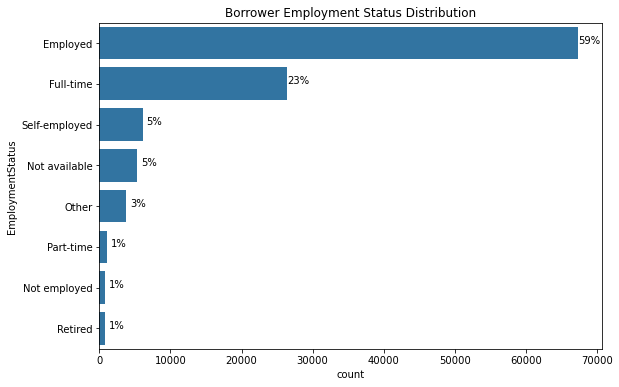

In [14]:
#Borrower Employment Status Distrobution
cat_order = loan_df_sub.EmploymentStatus.value_counts().index
plt.figure(figsize=[9, 6])
base_color = sb.color_palette()[0]

sb.countplot(data=loan_df_sub, y='EmploymentStatus', color=base_color, order=cat_order);
plt.title('Borrower Employment Status Distribution')

# add annotations
n_points = loan_df_sub.shape[0]
cat_counts = loan_df_sub['EmploymentStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1600, loc,  pct_string, ha = 'center', color = 'black');

* Most loans are given to employed individuals with a total of 59%, which is higher than other categories put together. This makes sense because they stand a better chance of repayment.

#### What Are Borrower's Occupation

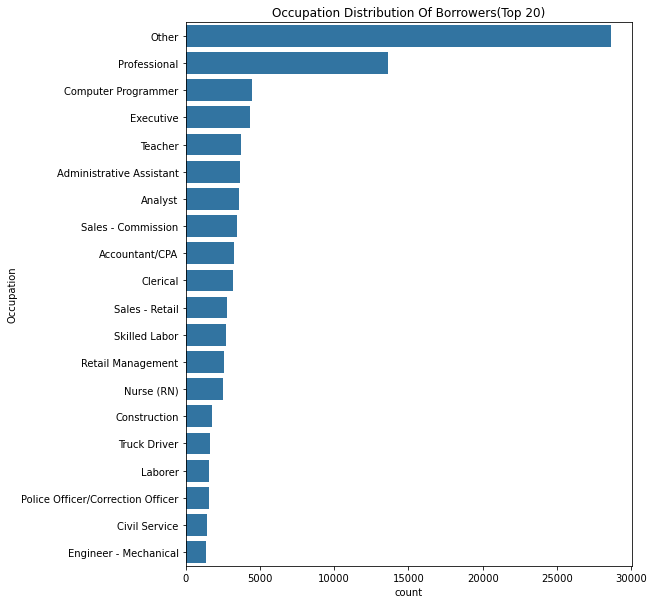

In [15]:
# Borrower Occupation Distribution of top 20 Occupation

cat_order = loan_df_sub.Occupation.value_counts().iloc[:20].index
plt.figure(figsize=[8, 10])
sb.countplot(data=loan_df_sub, y= 'Occupation', color=base_color, order=cat_order);
plt.title('Occupation Distribution Of Borrowers(Top 20)');

* Asides the borrowers whose occupation was not specified, it is seen that Professionals take the most loans. 

#### Borrower's State Distribution

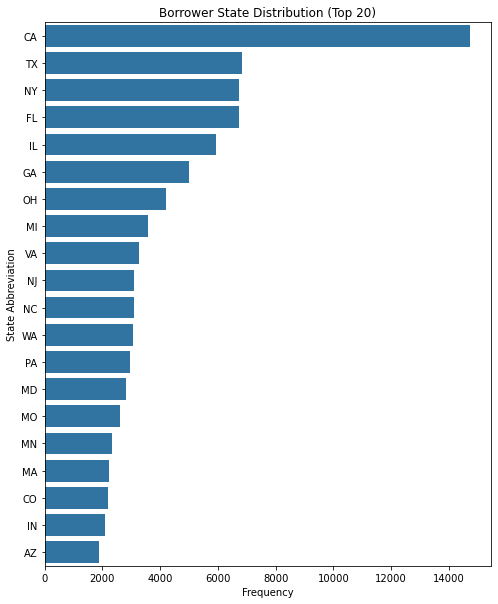

In [16]:
# Borrower State Distrobution (Top 20)
cat_order = loan_df_sub.BorrowerState.value_counts().iloc[:20].index
plt.figure(figsize=[8, 10])
sb.countplot(data=loan_df_sub, y='BorrowerState', color=base_color, order=cat_order);
plt.title('Borrower State Distribution (Top 20)')
plt.xlabel("Frequency")
plt.ylabel("State Abbreviation");

* It is seen that Califonia, CA, has the highest number of borrowers

#### What Are Borrower's Income Range?

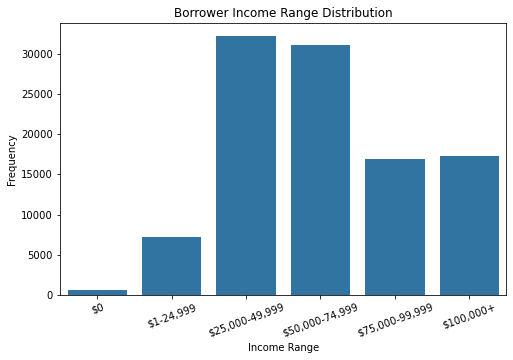

In [17]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[8, 5])
sb.countplot(data=loan_df_sub, x='IncomeRange', color=base_color);
plt.title('Borrower Income Range Distribution')
plt.xticks(rotation=20)
plt.xlabel("Income Range")
plt.ylabel("Frequency");

* People with yearly income range between $25,000 and $49,999 take out loans the most.

#### What Are Stated Monthly Income Of Borrower's?

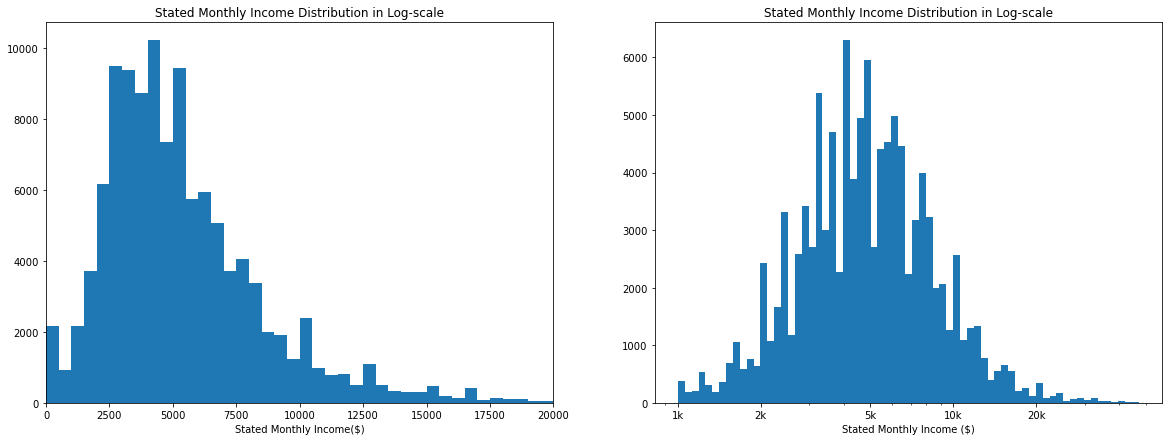

In [18]:
# Histogram to show the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)
bin= np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data= loan_df_sub, x = 'StatedMonthlyIncome', bins= bin)
plt.xlim(0, 20000)
plt.xlabel('Stated Monthly Income($)');
plt.title('Stated Monthly Income Distribution in Log-scale')

plt.subplot(1, 2, 2)
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)
plt.hist(data = loan_df_sub, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k','5k', '10k', '20k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distribution in Log-scale');

* From the visualization it is seen that most of the borrower's monthly income is around $3000 to $5000. Also before zooming in, it is seen from the first graph that the distribution is right skewed, this further burtresses the importance of looking closely.

#### What Does Original Loan Amount Distribution Look like?

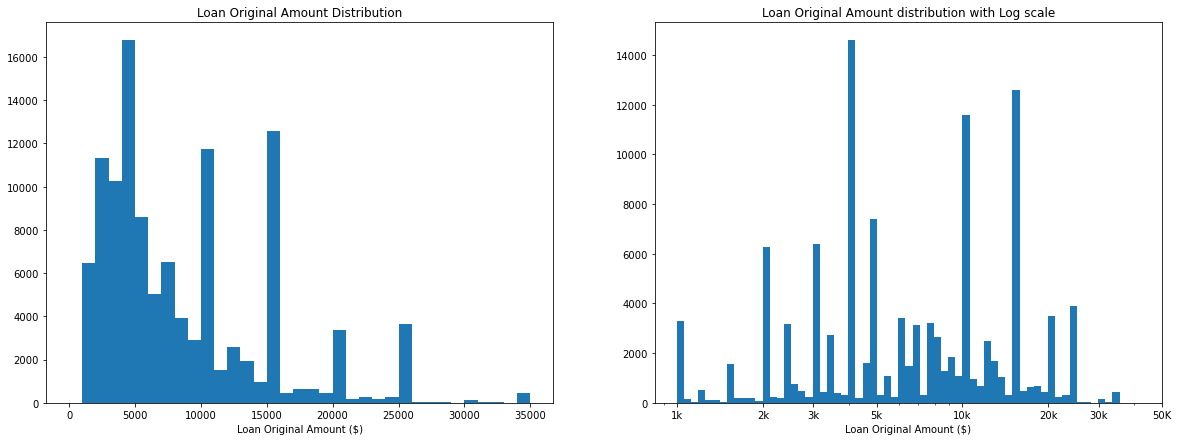

In [19]:
# Loan Original Amount Distribution

plt.figure(figsize = [20, 7]) 

plt.subplot(1, 2, 1) 
binsize = 1000
bins = np.arange(0, loan_df_sub['LoanOriginalAmount'].max()+binsize, binsize)

plt.hist(data = loan_df_sub, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distribution')

plt.subplot(1, 2, 2)
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loan_df_sub['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = loan_df_sub, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['1k', '2k','3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount distribution with Log scale');

* Here I had to use subplots for the visualization as first plot shows large spikes arround certain loan amount. Hence the second gragh with a log scale to zoom into those loan amounts.

#### How Is The Loan Status Distribution?

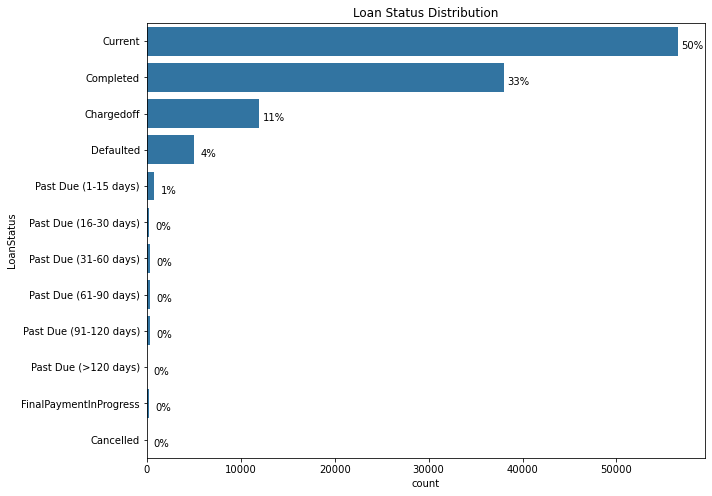

In [36]:
# Loan Status Distribution
#status_order = loan_df_sub['LoanStatus'].value_counts().index
status_order = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'FinalPaymentInProgress', 'Cancelled']
plt.figure(figsize=[10, 8])
sb.countplot(data=loan_df_sub ,y='LoanStatus', color=base_color, order=status_order);
plt.title('Loan Status Distribution')

n_points = loan_df_sub.shape[0]
cat_counts = loan_df_sub['LoanStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(count+1500, loc+0.2,  pct_string, ha = 'center', color = 'black');

* Majority of the loans are current.

#### What Are The Loan Listing Categories?

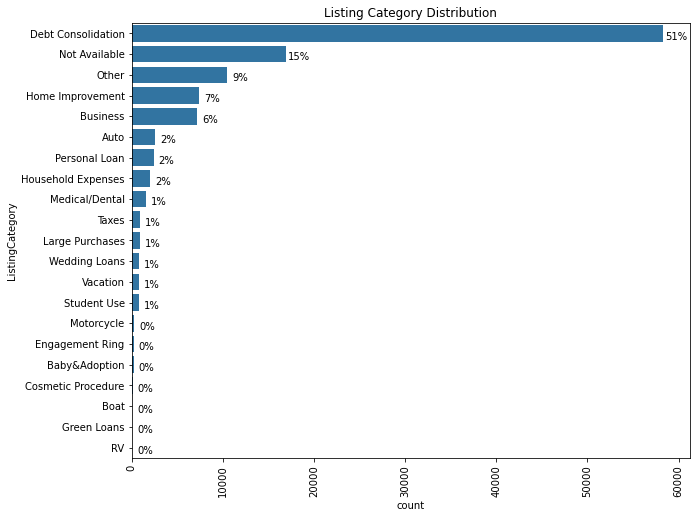

In [21]:
#Listing Category Distrobution
cat_order = loan_df_sub.ListingCategory.value_counts().index
plt.figure(figsize=[10, 8])
sb.countplot(data=loan_df_sub, y='ListingCategory', color=base_color, order=cat_order);
plt.title('Listing Category Distribution')
plt.xticks(rotation=90)

n_points = loan_df_sub.shape[0]
cat_counts = loan_df_sub['ListingCategory'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(count+1400, loc+0.3,  pct_string, ha = 'center', color = 'black');

* From the distribution above it is seen that most loans are taken to consolidate (pay off) other loans.

#### What Is The Most Likely Loan Term?

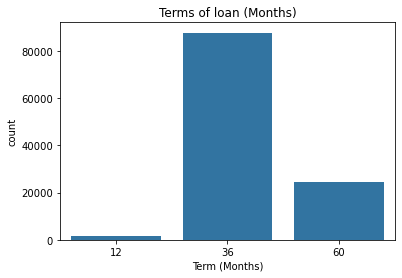

In [22]:
# Loan Term
base_color = sb.color_palette()[0]
sb.countplot(data=loan_df_sub, x= 'Term', color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

* Most of the loans are taken for 3 years (36 months) 

#### What Year Had The Most Loan Origination?

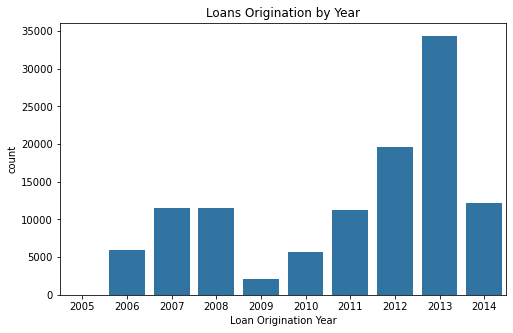

In [23]:
# Loan Origination by Year
plt.figure(figsize=[8, 5])
sb.countplot(data= loan_df_sub, x= loan_df_sub['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Origination by Year')
plt.xlabel('Loan Origination Year');

* According to the data most loans were taken out in 2013

#### What Does Loan Origination By Month Distribution Look Like?

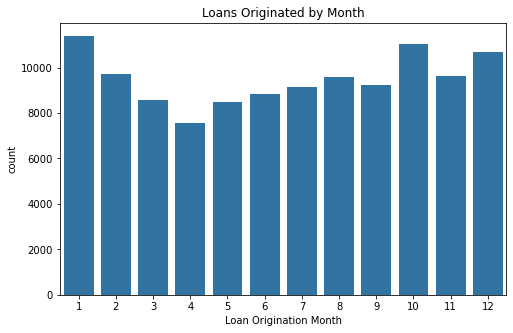

In [24]:
plt.figure(figsize=[8, 5])
sb.countplot(data= loan_df_sub, x= loan_df_sub['LoanOriginationDate'].dt.month, color=base_color)
plt.title('Loans Originated by Month')
plt.xlabel('Loan Origination Month');

* January and October has higher number of loan origination

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?  
Most loans are given to employed individuals with a total of 59%, this makes sense because they stand a better chance of repayment. Investigating the occupation of borrowers further confirmed that employment status plays a vital role in getting loans. Califonia is the state with highest number of borrowers and it is also seen that most borrowers have income range between $25000 and $50000. I also looked at stated monthly income of borrowers originaly the distribution was right skewed but up log transformation it became it is seen that most of the borrower's monthly income is around $3000 to $5000. also the distibution of origina loan amount was right skewed which also required a og transformation for a proper view. Most laon status is current. purpose for most oans is oan consoidation. And it seen that most oans are taken out for 3 years (36 months). 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?  

I had to fix some variable data types to enable getting proper insights from the data. Also, some features had long-tailed, skewed distributions, these were checked on a log-scale which revealed the hidden distribution in some areas.

## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the data. But will first be creating a list for numeric and categorical varial to aid in selecting ideal chart types.


In [25]:
loan_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ListingKey              113937 non-null  object        
 1   ListingCreationDate     113937 non-null  datetime64[ns]
 2   MemberKey               113937 non-null  object        
 3   BorrowerState           108422 non-null  category      
 4   EmploymentStatus        111682 non-null  category      
 5   Occupation              110349 non-null  category      
 6   BorrowerAPR             113912 non-null  float64       
 7   ClosedDate              55089 non-null   datetime64[ns]
 8   BorrowerRate            113937 non-null  float64       
 9   IsBorrowerHomeowner     113937 non-null  bool          
 10  IncomeRange             105390 non-null  category      
 11  IncomeVerifiable        113937 non-null  bool          
 12  StatedMonthlyIncome     113937

In [26]:
# List for For Numerical Variables.
num_vars =['Term', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']

# List for Categorical Variables
cat_vars = ['LoanStatus', 'ProsperRating', 'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange']

#### Scatter Plot Matrix For Dataset

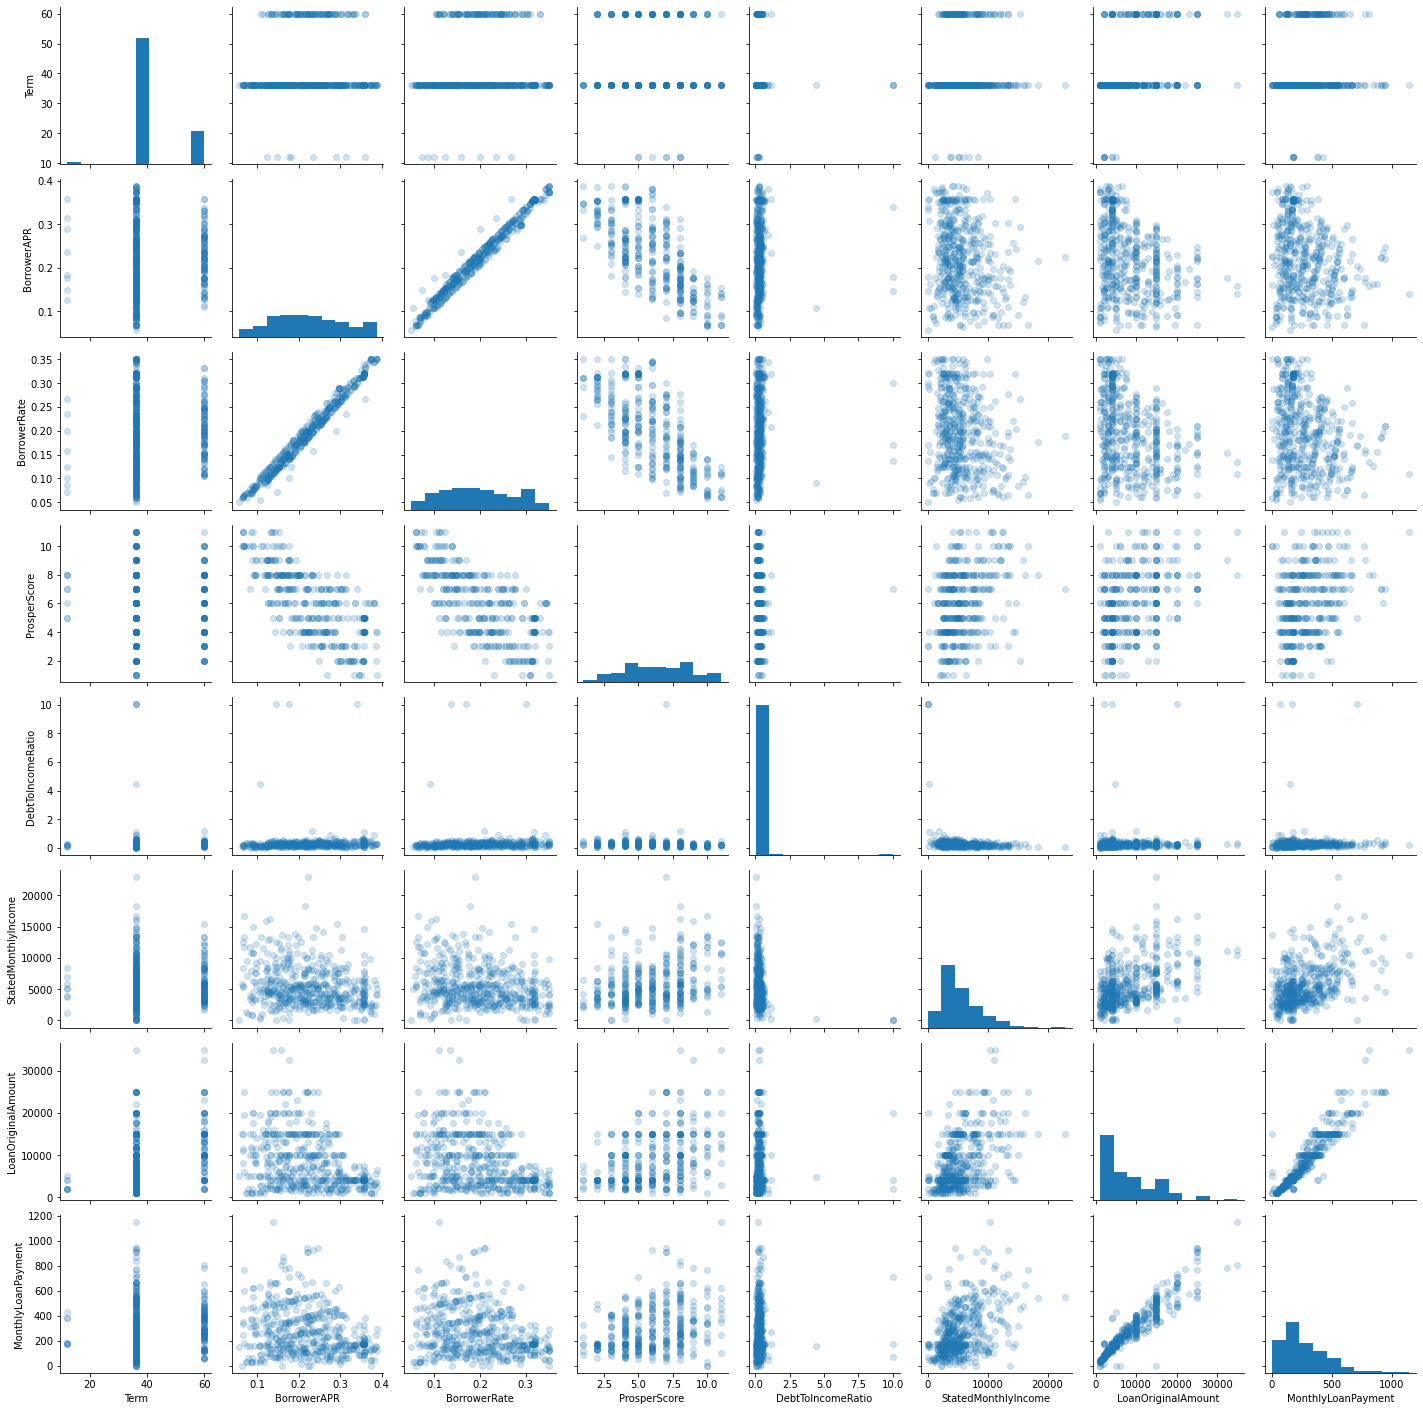

In [27]:
# Taking a sample of 500 loans 

loan_sub_sample = loan_df_sub.sample(n=500, replace = False)
g = sb.PairGrid(data = loan_sub_sample, vars = num_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter , alpha = 1/5);


* LoanOriginalAmount and MonthlyLoanPayment: Strong positive relationship. This makes sense because the bigger the loan the bigger the monthly payments.  

* ProsperScore and BorrowerAPR: Negative relationship, because lower prosper score means higher risks and hence higher interest rates.  

* LoanOriginalAmount and ProsperScore: positive relationship, as expected borrowers with better prosper score are most ikely to get higher loans.  

* LoanOriginalAmount and BorrowerAPR: negative relationship, we may expect that the bigger the loan amount the less the interest rate.  

* StatedMonthlyIncome and LoanOriginalAmount: positive relationship.

#### What Is The Reationship between Loan Origianal Amount & Monthly Loan Payment

Text(0.5, 0, 'LoanOriginalAmount')

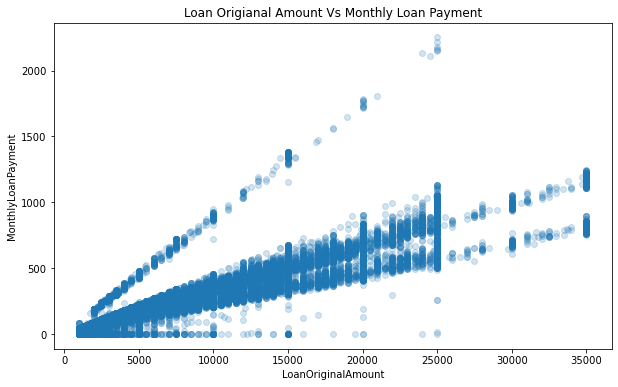

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(data=loan_df_sub, x='LoanOriginalAmount', y='MonthlyLoanPayment', alpha=1/5)
plt.title('Loan Origianal Amount Vs Monthly Loan Payment')
plt.ylabel('MonthlyLoanPayment')
plt.xlabel('LoanOriginalAmount')

* This shows that the higher the loan taken the higher the momthly payment required.

#### What Is The Reationship Loan Orignal Amount & Employment Status

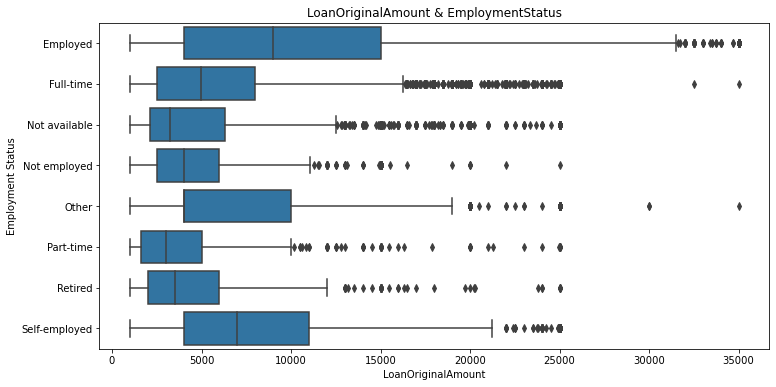

In [29]:
plt.figure(figsize = [12, 6])
sb.boxplot(data=loan_df_sub,x='LoanOriginalAmount',y='EmploymentStatus',color=base_color);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Employment Status');
plt.title('LoanOriginalAmount & EmploymentStatus');

* As expected, employed borrowers are entitled to larger loan sums.

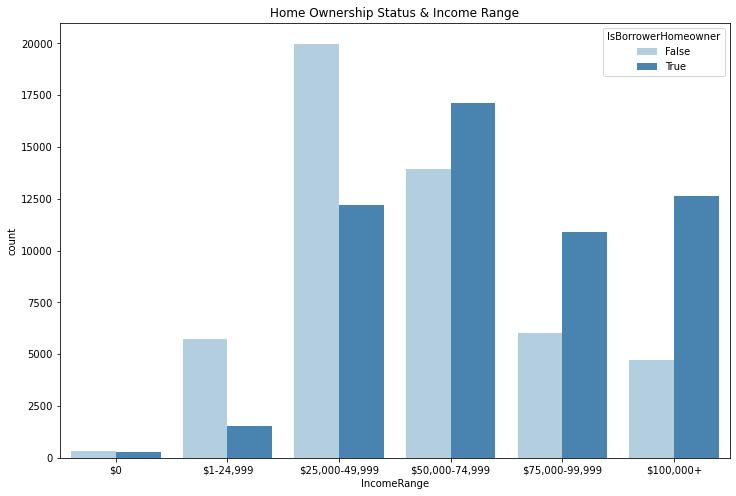

In [30]:
plt.figure(figsize= (12,8))
sb.countplot(data = loan_df_sub, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.title('Home Ownership Status & Income Range');


* It is seen that Borrowers with income range between $25000 and $100000+ are mostly home owners.

In [31]:
loan_df_sub['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

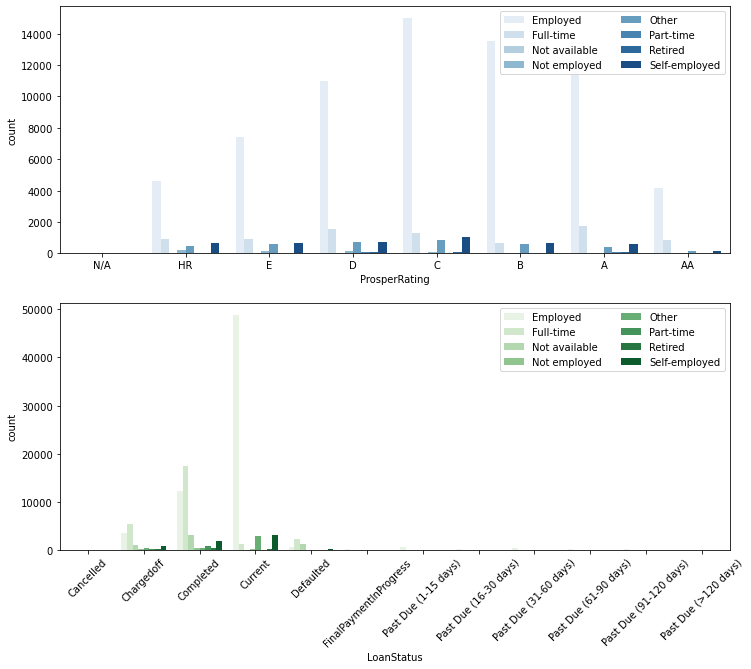

In [32]:
plt.figure(figsize = [12, 10])


# subplot 1: ProsperRating vs EmploymentStatus
ax = plt.subplot(2, 1, 1)
sb.countplot(data = loan_df_sub, x = 'ProsperRating', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 2: LoanStatus vs EmploymentStatus
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan_df_sub, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=45)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The Loan original amount has a strong positive relationship with the monthly loan payment, this makes sense because the bigger the loan the bigger the monthly payments. It is also seen that prosper score and Borrower APR are negatively related, because lower prosper score means higher risks and hence higher interest rates. Loan original amount and prosper score however have positive relationship, this is expected because borrowers with better prosper score are most ikely to get higher loans. Also the higher the loan taken the higher the momthly payment required. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?  

I observed that EmploymentStatus has a relation with ProsperRating where the un-employed are mostly given a High Risk rating. Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners. There is also a positive relationship between the term of oan and the loan amount given to individuas.



## Multivariate Exploration

In [33]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

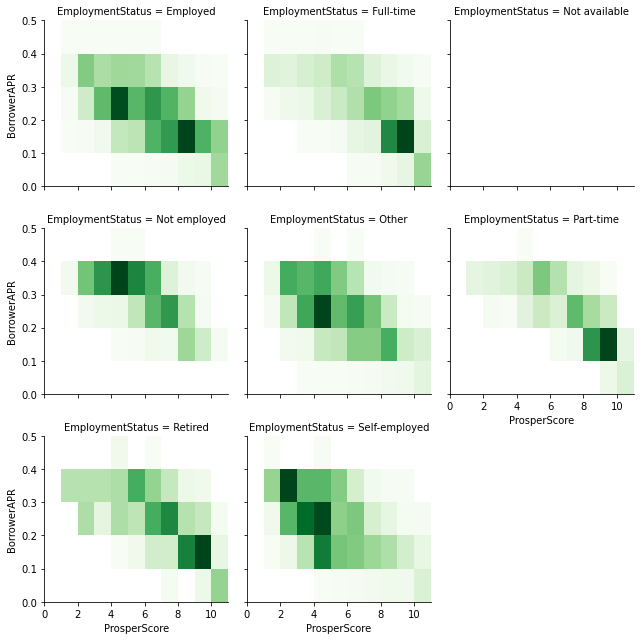

In [34]:
# create faceted heat maps on the EmploymentStatus
g = sb.FacetGrid(data = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not available'], col = 'EmploymentStatus', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'Greens')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR');



* Full-Time and part-time workers tend to have higher ProsperScore and lower BorrowerAPR

* Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR  

* Employed people are diverse regarding the ProsperScore and BorrowerAPR  

* Retired people have higher ProsperScore and lower BorrowerAPR

#### LoanStatus Vs BorrowerAPR By EmploymentStatus

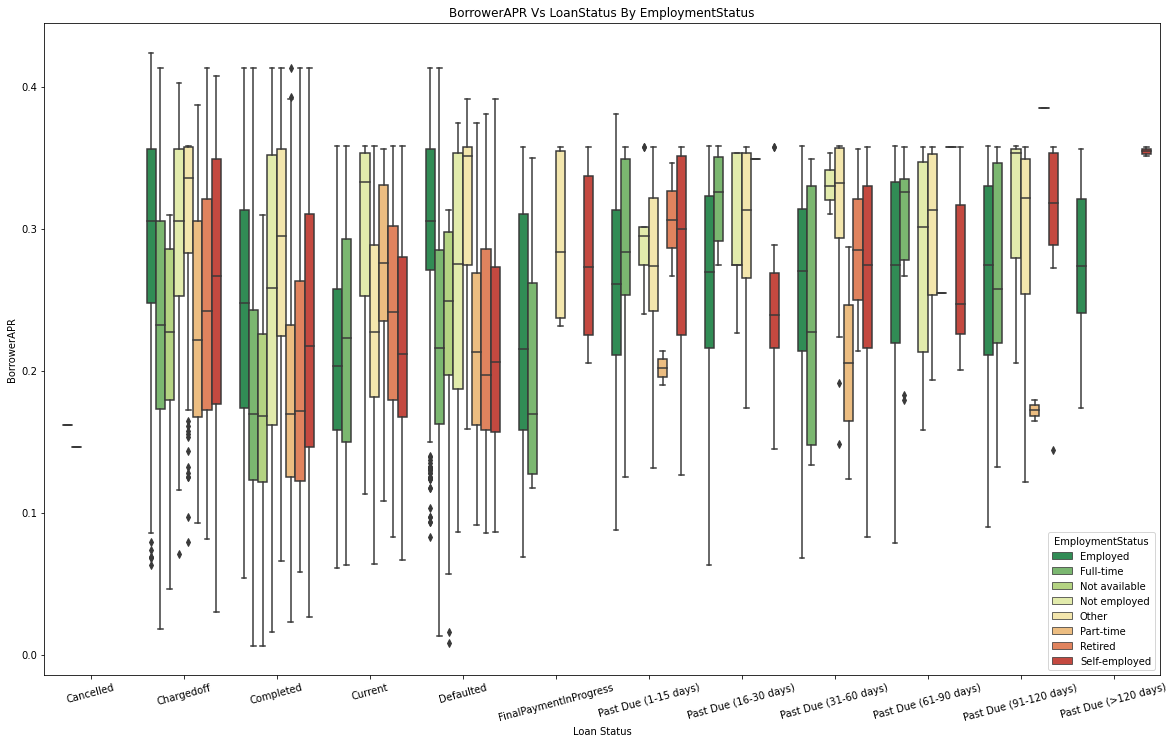

In [35]:
# LoanStatus Vs BorrowerAPR By EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data= loan_df_sub, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus By EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);


* For each category of loan status, the lowest APR is for Employed and Full-time. Whereas highest APR is for Not employed.  

* Most of the high BorrowerAPR are on the chargeoff, completed and current.  

* We notice some outliers in chargeoff and defaulted loan status.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We see that Employed people are diverse regarding the Loan Status and BorrowerAPR as they have sometimes high borrower rate like in chargeoff and sometimes low borrower rate like in the past dues. Employees with Full-Time and part-time tend to have lower BorrowerAPR across all loan status categories. Employees with Not-Employed & Self-Employed tend to have higher BorrowerAPR in some areas like the past dues but lower BorrowerAPR in the current and completed status. 


### Were there any interesting or surprising interactions between features?

I used boxplots and heatmaps to understand some relations, particularly to find out that ProsperScore and BorrowerAPR were negatively correlated as higher the prosper score lower will be the risk attached hence lower will be the APR and that further lowers down the yield.

## Conclusions
Much of wrangling was not done during the course of this analysis as the dataset came pretty much clean. However to ensure proper analysis and avoid producing wrong results I had to change data types of some features which came with improper datatypes, like changing listingOriginalDate and LoanOriginationDate to Datetime type, Also features like ListingCategory, LoanStatus and EmploymentedStatus were converted to category type features. Finally I had to trim down the dataset and picked only features that were of interest in my analysis. This reduced the dataset shape from (113937, 81) to (113937, 26).  

Then I went into the analysis proper and below are some major insights gotten through visualization of the dataset;
* Most loans are given to employed individuals with a total of 59%, which is higher than other categories put together. This makes sense because they stand a better chance of repayment.  
* Asides the borrowers whose occupation was not specified, it is seen that Professionals take the most loans.  
* Califonia, CA, has the highest number of borrowers.  
* People with yearly income range between $25,000 and $49,999 take out loans the most.  
* Majority of the loans are current.  
* Most loans are taken to consolidate (pay off) other loans.  
* LoanOriginalAmount and MonthlyLoanPayment have a strong positive relationship.  
* ProsperScore and BorrowerAPR have a negative relationship'  
* LoanOriginalAmount and ProsperScore have positive relationship.  
* LoanOriginalAmount and BorrowerAPR have a negative relationship.  
* StatedMonthlyIncome and LoanOriginalAmount have apositive relationship.
* For each category of loan status, the lowest APR is for Employed and Full-time. Whereas highest APR is for Not employed.

##### References
* Kaggle
* StackOverflow
* Github